This is a notebook to explore the daily Live Ocean model output data from Parker MacCready. The datafile contains three years of daily measurements at one location (location of Oregon Slope Base shallow profiler). 

What Rob would like me to do:

"I suggest that you open Parker's file using XArray and troll it out. Translation: Become an expert... with the idea of comparing it or matching it to RCA. Here are some questions: 
* What is the spatial extent? (I mean map plane, not depth to start with.) --> Parker gave me data specifically for the Oregon Slope Base coordinates. 
* What is the map plane posting (grid cell size). --> See above.
* How does this compare to MODIS? Are the spacings even or do they vary like plaid? --> Will need to ask Parker where I can obtain more of his data. This might be risky though, it's probably a lot more data than I've ever worked with before. Maybe I could ask him for data for a region covering the OOI RCA locations. 
* How many vertical levels are there? --> 30
* Is the lowest level at the sea floor? --> guessing not
* Highest level at the surface? --> Zeta is surface (changes w/ tides)
* Are the cells vertically evenly spaced or do they change from surface to sea floor? 
* What are the parameters provided as Data Variables (or Coordinates)? 
* Are you able to see a fresh water lens from the Columbia? 
* Does this data overlap with any RCA sites? 
* If so can you do a contemporaneous water column comparison, like one from winter, one from summer? 

And so on." -Rob



I also received notes from Parker:

"The model has 30 vertical levels, and their z-position is the variable z_rho.  The surface height is zeta. Time is ocean_time which is seconds from 1/1/1970.  Zeta, adn z_rho are functions of time because it moves with the free surface, which mainly moves because of the tides." -Parker

In [94]:
pip install xarray -q

Note: you may need to restart the kernel to use updated packages.


In [95]:
import numpy as np
from numpy import datetime64 as dt64, timedelta64 as td64

import os
import xarray as xr
import pandas as pd
from matplotlib import pyplot as plt

from netCDF4 import Dataset, num2date, date2num 
from datetime import datetime, timedelta

In [96]:
ds = xr.open_dataset('deryaOOI_daily.nc')

In [118]:
ds = ds.swap_dims({'s_rho':'z_rho'})

ValueError: replacement dimension 'z_rho' is not a 1D variable along the old dimension 's_rho'

In [97]:
ds

<xarray.Dataset>
Dimensions:        (ocean_time: 1095, s_rho: 30, s_w: 31, scalar: 1)
Coordinates:
  * ocean_time     (ocean_time) datetime64[ns] 2017-01-01T20:00:00 ... 2019-12-31T20:00:00
Dimensions without coordinates: s_rho, s_w, scalar
Data variables:
    h              (scalar) float64 ...
    lon_rho        (scalar) float64 ...
    lat_rho        (scalar) float64 ...
    lon_u          (scalar) float64 ...
    lat_u          (scalar) float64 ...
    lon_v          (scalar) float64 ...
    lat_v          (scalar) float64 ...
    zeta           (ocean_time) float64 ...
    ubar           (ocean_time) float64 ...
    vbar           (ocean_time) float64 ...
    Pair           (ocean_time) float64 ...
    Uwind          (ocean_time) float64 ...
    Vwind          (ocean_time) float64 ...
    shflux         (ocean_time) float64 ...
    latent         (ocean_time) float64 ...
    sensible       (ocean_time) float64 ...
    lwrad          (ocean_time) float64 ...
    swrad          (ocean_time) float64 ...
    sustr          (ocean_time) float64 ...
    svstr          (ocean_time) float64 ...
    bustr          (ocean_time) float64 ...
    bvstr          (ocean_time) float64 ...
    u              (ocean_time, s_rho) float64 ...
    v              (ocean_time, s_rho) float64 ...
    temp           (ocean_time, s_rho) float64 ...
    salt           (ocean_time, s_rho) float64 ...
    NO3            (ocean_time, s_rho) float64 ...
    phytoplankton  (ocean_time, s_rho) float64 ...
    zooplankton    (ocean_time, s_rho) float64 ...
    detritus       (ocean_time, s_rho) float64 ...
    Ldetritus      (ocean_time, s_rho) float64 ...
    oxygen         (ocean_time, s_rho) float64 ...
    TIC            (ocean_time, s_rho) float64 ...
    alkalinity     (ocean_time, s_rho) float64 ...
    rho            (ocean_time, s_rho) float64 ...
    w              (ocean_time, s_w) float64 ...
    AKv            (ocean_time, s_w) float64 ...
    AKs            (ocean_time, s_w) float64 ...
    z_rho          (ocean_time, s_rho) float64 ...
    z_w            (ocean_time, s_w) float64 ...

In [98]:
dir(ds)

['AKs',
 'AKv',
 'Ldetritus',
 'NO3',
 'Pair',
 'TIC',
 'Uwind',
 'Vwind',
 '_HANDLED_TYPES',
 '__abs__',
 '__abstractmethods__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__bool__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__copy__',
 '__dask_graph__',
 '__dask_keys__',
 '__dask_layers__',
 '__dask_optimize__',
 '__dask_postcompute__',
 '__dask_postpersist__',
 '__dask_scheduler__',
 '__dask_tokenize__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__div__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__module__',
 '__mul__',

In [99]:
ds.var

<bound method ImplementsDatasetReduce._reduce_method.<locals>.wrapped_func of <xarray.Dataset>
Dimensions:        (ocean_time: 1095, s_rho: 30, s_w: 31, scalar: 1)
Coordinates:
  * ocean_time     (ocean_time) datetime64[ns] 2017-01-01T20:00:00 ... 2019-12-31T20:00:00
Dimensions without coordinates: s_rho, s_w, scalar
Data variables:
    h              (scalar) float64 2.936e+03
    lon_rho        (scalar) float64 -125.4
    lat_rho        (scalar) float64 44.53
    lon_u          (scalar) float64 -125.4
    lat_u          (scalar) float64 44.53
    lon_v          (scalar) float64 -125.4
    lat_v          (scalar) float64 44.53
    zeta           (ocean_time) float64 0.4651 0.03834 ... 0.05284 -0.1489
    ubar           (ocean_time) float64 0.02567 0.03765 ... 0.02473 0.02995
    vbar           (ocean_time) float64 0.02551 0.03293 ... 0.02536 0.02544
    Pair           (ocean_time) float64 1.009e+03 1.009e+03 ... 1.019e+03
    Uwind          (ocean_time) float64 7.525 -2.196 -8.943 ...

In [100]:
salt.data?

In [101]:
dir(salt)

['T',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__dask_graph__',
 '__dask_keys__',
 '__dask_layers__',
 '__dask_optimize__',
 '__dask_postcompute__',
 '__dask_postpersist__',
 '__dask_scheduler__',
 '__dask_tokenize__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__div__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '_

<xarray.DataArray 'zeta' (ocean_time: 1095)>
array([ 0.465143,  0.038341, -0.337267, ...,  0.355176,  0.052843, -0.148856])
Coordinates:
  * ocean_time  (ocean_time) datetime64[ns] 2017-01-01T20:00:00 ... 2019-12-31T20:00:00
Attributes:
    long_name:  free-surface
    units:      meter


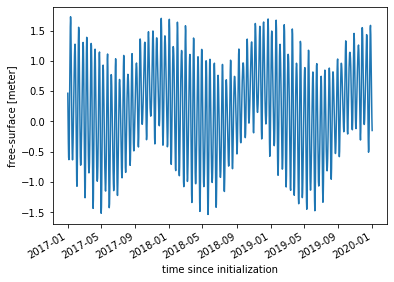

In [102]:
# The surface height is zeta.

zeta = ds.zeta
ds.zeta.plot()
print(zeta)

In [103]:
# The model has 30 vertical levels, and their z-position is the variable z_rho.

z_rho = ds.z_rho
print(z_rho)
z_rho_list = []
for value in z_rho:
    z_rho_list.append(value)
    
print(len(z_rho))
print(len(z_rho_list))

<xarray.DataArray 'z_rho' (ocean_time: 1095, s_rho: 30)>
array([[-2.870614e+03, -2.726738e+03, -2.568860e+03, ..., -1.476383e+01,
        -5.193106e+00, -2.729953e-01],
       [-2.870624e+03, -2.726768e+03, -2.568913e+03, ..., -1.518842e+01,
        -5.619085e+00, -6.996895e-01],
       [-2.870632e+03, -2.726795e+03, -2.568960e+03, ..., -1.556208e+01,
        -5.993969e+00, -1.075203e+00],
       ...,
       [-2.870617e+03, -2.726745e+03, -2.568874e+03, ..., -1.487323e+01,
        -5.302861e+00, -3.829349e-01],
       [-2.870623e+03, -2.726767e+03, -2.568911e+03, ..., -1.517399e+01,
        -5.604611e+00, -6.851913e-01],
       [-2.870628e+03, -2.726781e+03, -2.568937e+03, ..., -1.537464e+01,
        -5.805921e+00, -8.868395e-01]])
Coordinates:
  * ocean_time  (ocean_time) datetime64[ns] 2017-01-01T20:00:00 ... 2019-12-31T20:00:00
Dimensions without coordinates: s_rho
Attributes:
    long_name:  z on rho points (positive up)
    units:      m
1095
1095


It would be nice to get this plot to have z_rho on the y-axis instead of s_rho. s_rho is the bin number (in this case there are 30 bins) and z_rho is the actual depth in meters. 

1095
1095


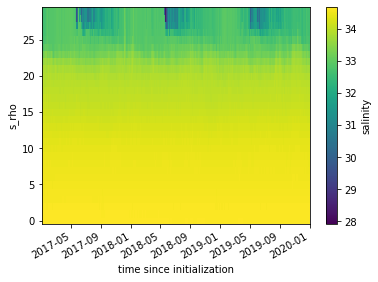

In [104]:
# Look at model salinity.

salt = ds.salt
ds.salt.plot(x='ocean_time')
salt_list = []
for value in salt:
    salt_list.append(value)
print(len(salt))
print(len(salt_list))

In [105]:
# Look at lat lon coordinates

print(ds.lon_rho)
print(ds.lat_rho)

<xarray.DataArray 'lon_rho' (scalar: 1)>
array([-125.38966])
Dimensions without coordinates: scalar
Attributes:
    long_name:  longitude of RHO-points
    units:      degree_east
<xarray.DataArray 'lat_rho' (scalar: 1)>
array([44.52897])
Dimensions without coordinates: scalar
Attributes:
    long_name:  latitude of RHO-points
    units:      degree_north


In [114]:
# Look at model time.

time = ds.ocean_time
time_list = []
for value in time:
    time_list.append(value)
print(len(time))
print(len(time_list))

1095
1095


In [117]:
# Depth profile of salinity

z = salt_list
y = z_rho_list
x = time_list
X, Y = np.meshgrid(x, y)

fig, ax = plt.subplots()
CS = ax.contour(x, y, z)

ValueError: Could not convert object to NumPy datetime